This notebook compares different LatentVAE and LatentAutoencoder hyperparameter settings and the corresponding training results.

In [1]:
import yaml

from src.models.latent_models import LatentVAE, LatentVQVAE, LatentAutoencoder

In [2]:
# Model configuration
model_1_config_path = "../models/latent_vae/configs/sd35m_to_512d.yaml"
# model_2_config_path = "../models/latent_autoencoder/configs/sd35m_to_512d.yaml"
model_2_config_path = "../models/latent_vqvae/configs/sd35m_to_512d.yaml"
model_3_config_path = "../models/latent_vqvae/configs/sd35m_to_512d_attn.yaml"

# Load model configs
with open(model_1_config_path, "r") as f:
    model_1_config = yaml.safe_load(f)
with open(model_2_config_path, "r") as f:
    model_2_config = yaml.safe_load(f)
with open(model_3_config_path, "r") as f:
    model_3_config = yaml.safe_load(f)

# Checkpoints
model_1_ckpt_path = "../models/latent_vae/version_9/checkpoints/epoch=65-step=32538.ckpt"
# model_2_ckpt_path = "../models/latent_autoencoder/version_0/checkpoints/epoch=71-step=35496.ckpt"
model_2_ckpt_path = "../models/latent_vqvae/version_3/checkpoints/last.ckpt"
model_3_ckpt_path = "../models/latent_vqvae/version_5/checkpoints/last.ckpt"

In [3]:
# Initialize models
model_1 = LatentVAE(
    ddconfig=model_1_config["ddconfig"],
    lossconfig=model_1_config["lossconfig"],
    embed_dim=model_1_config["embed_dim"],
    ckpt_path=model_1_ckpt_path,
    monitor="val_total_loss",
)
model_1.eval()
# model_2 = LatentAutoencoder(
#     ddconfig=model_2_config["ddconfig"],
#     lossconfig=model_2_config["lossconfig"],
#     embed_dim=model_2_config["embed_dim"],
#     ckpt_path=model_2_ckpt_path,
#     monitor="val_total_loss",
# )
model_2 = LatentVQVAE(
    ddconfig=model_2_config["ddconfig"],
    lossconfig=model_2_config["lossconfig"],
    n_embed=model_2_config["embedconfig"]["n_embed"],
    embed_dim=model_2_config["embedconfig"]["embed_dim"],
    ckpt_path=model_2_ckpt_path,
    monitor="val_total_loss",
)
model_2.eval()
model_3 = LatentVQVAE(
    ddconfig=model_3_config["ddconfig"],
    lossconfig=model_3_config["lossconfig"],
    n_embed=model_3_config["embedconfig"]["n_embed"],
    embed_dim=model_3_config["embedconfig"]["embed_dim"],
    ckpt_path=model_3_ckpt_path,
    monitor="val_total_loss",
)
model_3.eval()

making attention of type 'none' with 128 in_channels
Working with z of shape (1, 8, 8, 8) = 512 dimensions.
making attention of type 'none' with 128 in_channels
Restored from ../models/latent_vae/version_9/checkpoints/epoch=65-step=32538.ckpt
making attention of type 'none' with 128 in_channels
Working with z of shape (1, 8, 8, 8) = 512 dimensions.
making attention of type 'none' with 128 in_channels
Deleting key model_ema.decay from state_dict.
Deleting key model_ema.num_updates from state_dict.
Deleting key model_ema.encoderconv_inweight from state_dict.
Deleting key model_ema.encoderconv_inbias from state_dict.
Deleting key model_ema.encoderdown0block0norm1weight from state_dict.
Deleting key model_ema.encoderdown0block0norm1bias from state_dict.
Deleting key model_ema.encoderdown0block0conv1weight from state_dict.
Deleting key model_ema.encoderdown0block0conv1bias from state_dict.
Deleting key model_ema.encoderdown0block0norm2weight from state_dict.
Deleting key model_ema.encoderdo

LatentVQVAE(
  (encoder): Encoder(
    (conv_in): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0): Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 64, eps=1e-06, affine=True)
            (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 64, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (1): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 64, eps=1e-06, affine=True)
            (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupN

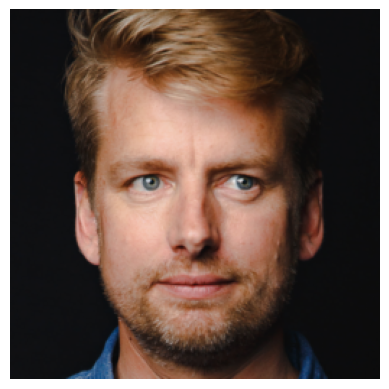

Image shape: torch.Size([1, 3, 256, 256])


In [16]:
# Load one example image
import torch
IMAGE_TENSOR_PATH = "../data/ffhq/pt_images/65432.pt" #54321.pt

img_tensor = torch.load(IMAGE_TENSOR_PATH)

# Add batch dimension: Change from (C, H, W) to (B, C, H, W)
img_tensor = img_tensor.unsqueeze(0)

# Show the image
import matplotlib.pyplot as plt
import numpy as np
img = img_tensor.squeeze(0).permute(1, 2, 0).numpy()
plt.imshow((img + 1) / 2)
plt.axis('off')
plt.show()
print("Image shape:", img_tensor.shape)

In [6]:
# Load Stable Diffusion VAE model
from diffusers import AutoencoderKL

sd_vae = AutoencoderKL.from_pretrained("stabilityai/stable-diffusion-3.5-medium", subfolder="vae")
sd_vae.eval()

2025-04-20 16:20:29.912729: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 16:20:30.773941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745158831.075183 2911025 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745158831.179873 2911025 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745158831.861746 2911025 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (nonlinearity): SiLU()
          )
        )
        (downsamplers): ModuleList(
          (0): Downsample2D(
            (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
          )
        )
      )
      (1): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0): ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (c

In [21]:
# plot 5 random inputs and recons next to each other
import os
import glob
import random
# Load the images from the folder
IMAGE_FOLDER = "../data/ffhq/pt_images/"
IMAGE_TENSOR_PATHS = glob.glob(os.path.join(IMAGE_FOLDER, "*.pt"))
# Select 5 random images
random.seed(42)
random.shuffle(IMAGE_TENSOR_PATHS)
selected_paths = IMAGE_TENSOR_PATHS[:5]
# Initialize lists to store images and reconstructions
input_images = []
recon_img_1 = []
recon_img_2 = []
recon_img_3 = []
# Loop through the selected images
for path in selected_paths:
    # Load the image
    img_tensor = torch.load(path)
    # Add batch dimension: Change from (C, H, W) to (B, C, H, W)
    img_tensor = img_tensor.unsqueeze(0)
    # Encode the image using the Stable Diffusion VAE
    sd_latent = sd_vae.encode(img_tensor).latent_dist.sample()
    # Encode and decode the latent using model 1
    recon_1 = model_1.decode(model_1.encode(sd_latent).sample())
    # Encode and decode the latent using model 2
    recon_2 = model_2.decode(model_2.encode(sd_latent)[0])
    # Encode and decode the latent using model 3
    recon_3 = model_3.decode(model_3.encode(sd_latent)[0])
    # Decode the latents using the Stable Diffusion VAE
    sd_recon_1 = sd_vae.decode(recon_1).sample
    sd_recon_2 = sd_vae.decode(recon_2).sample
    sd_recon_3 = sd_vae.decode(recon_3).sample
    # Clip the reconstructions to the range [-1, 1]
    sd_recon_1 = torch.clamp(sd_recon_1, -1, 1)
    sd_recon_2 = torch.clamp(sd_recon_2, -1, 1)
    sd_recon_3 = torch.clamp(sd_recon_3, -1, 1)
    # Store the images
    input_images.append(img_tensor.squeeze(0).permute(1, 2, 0).numpy())
    recon_img_1.append(sd_recon_1.squeeze(0).permute(1, 2, 0).detach().cpu().numpy())
    recon_img_2.append(sd_recon_2.squeeze(0).permute(1, 2, 0).detach().cpu().numpy())
    recon_img_3.append(sd_recon_3.squeeze(0).permute(1, 2, 0).detach().cpu().numpy())

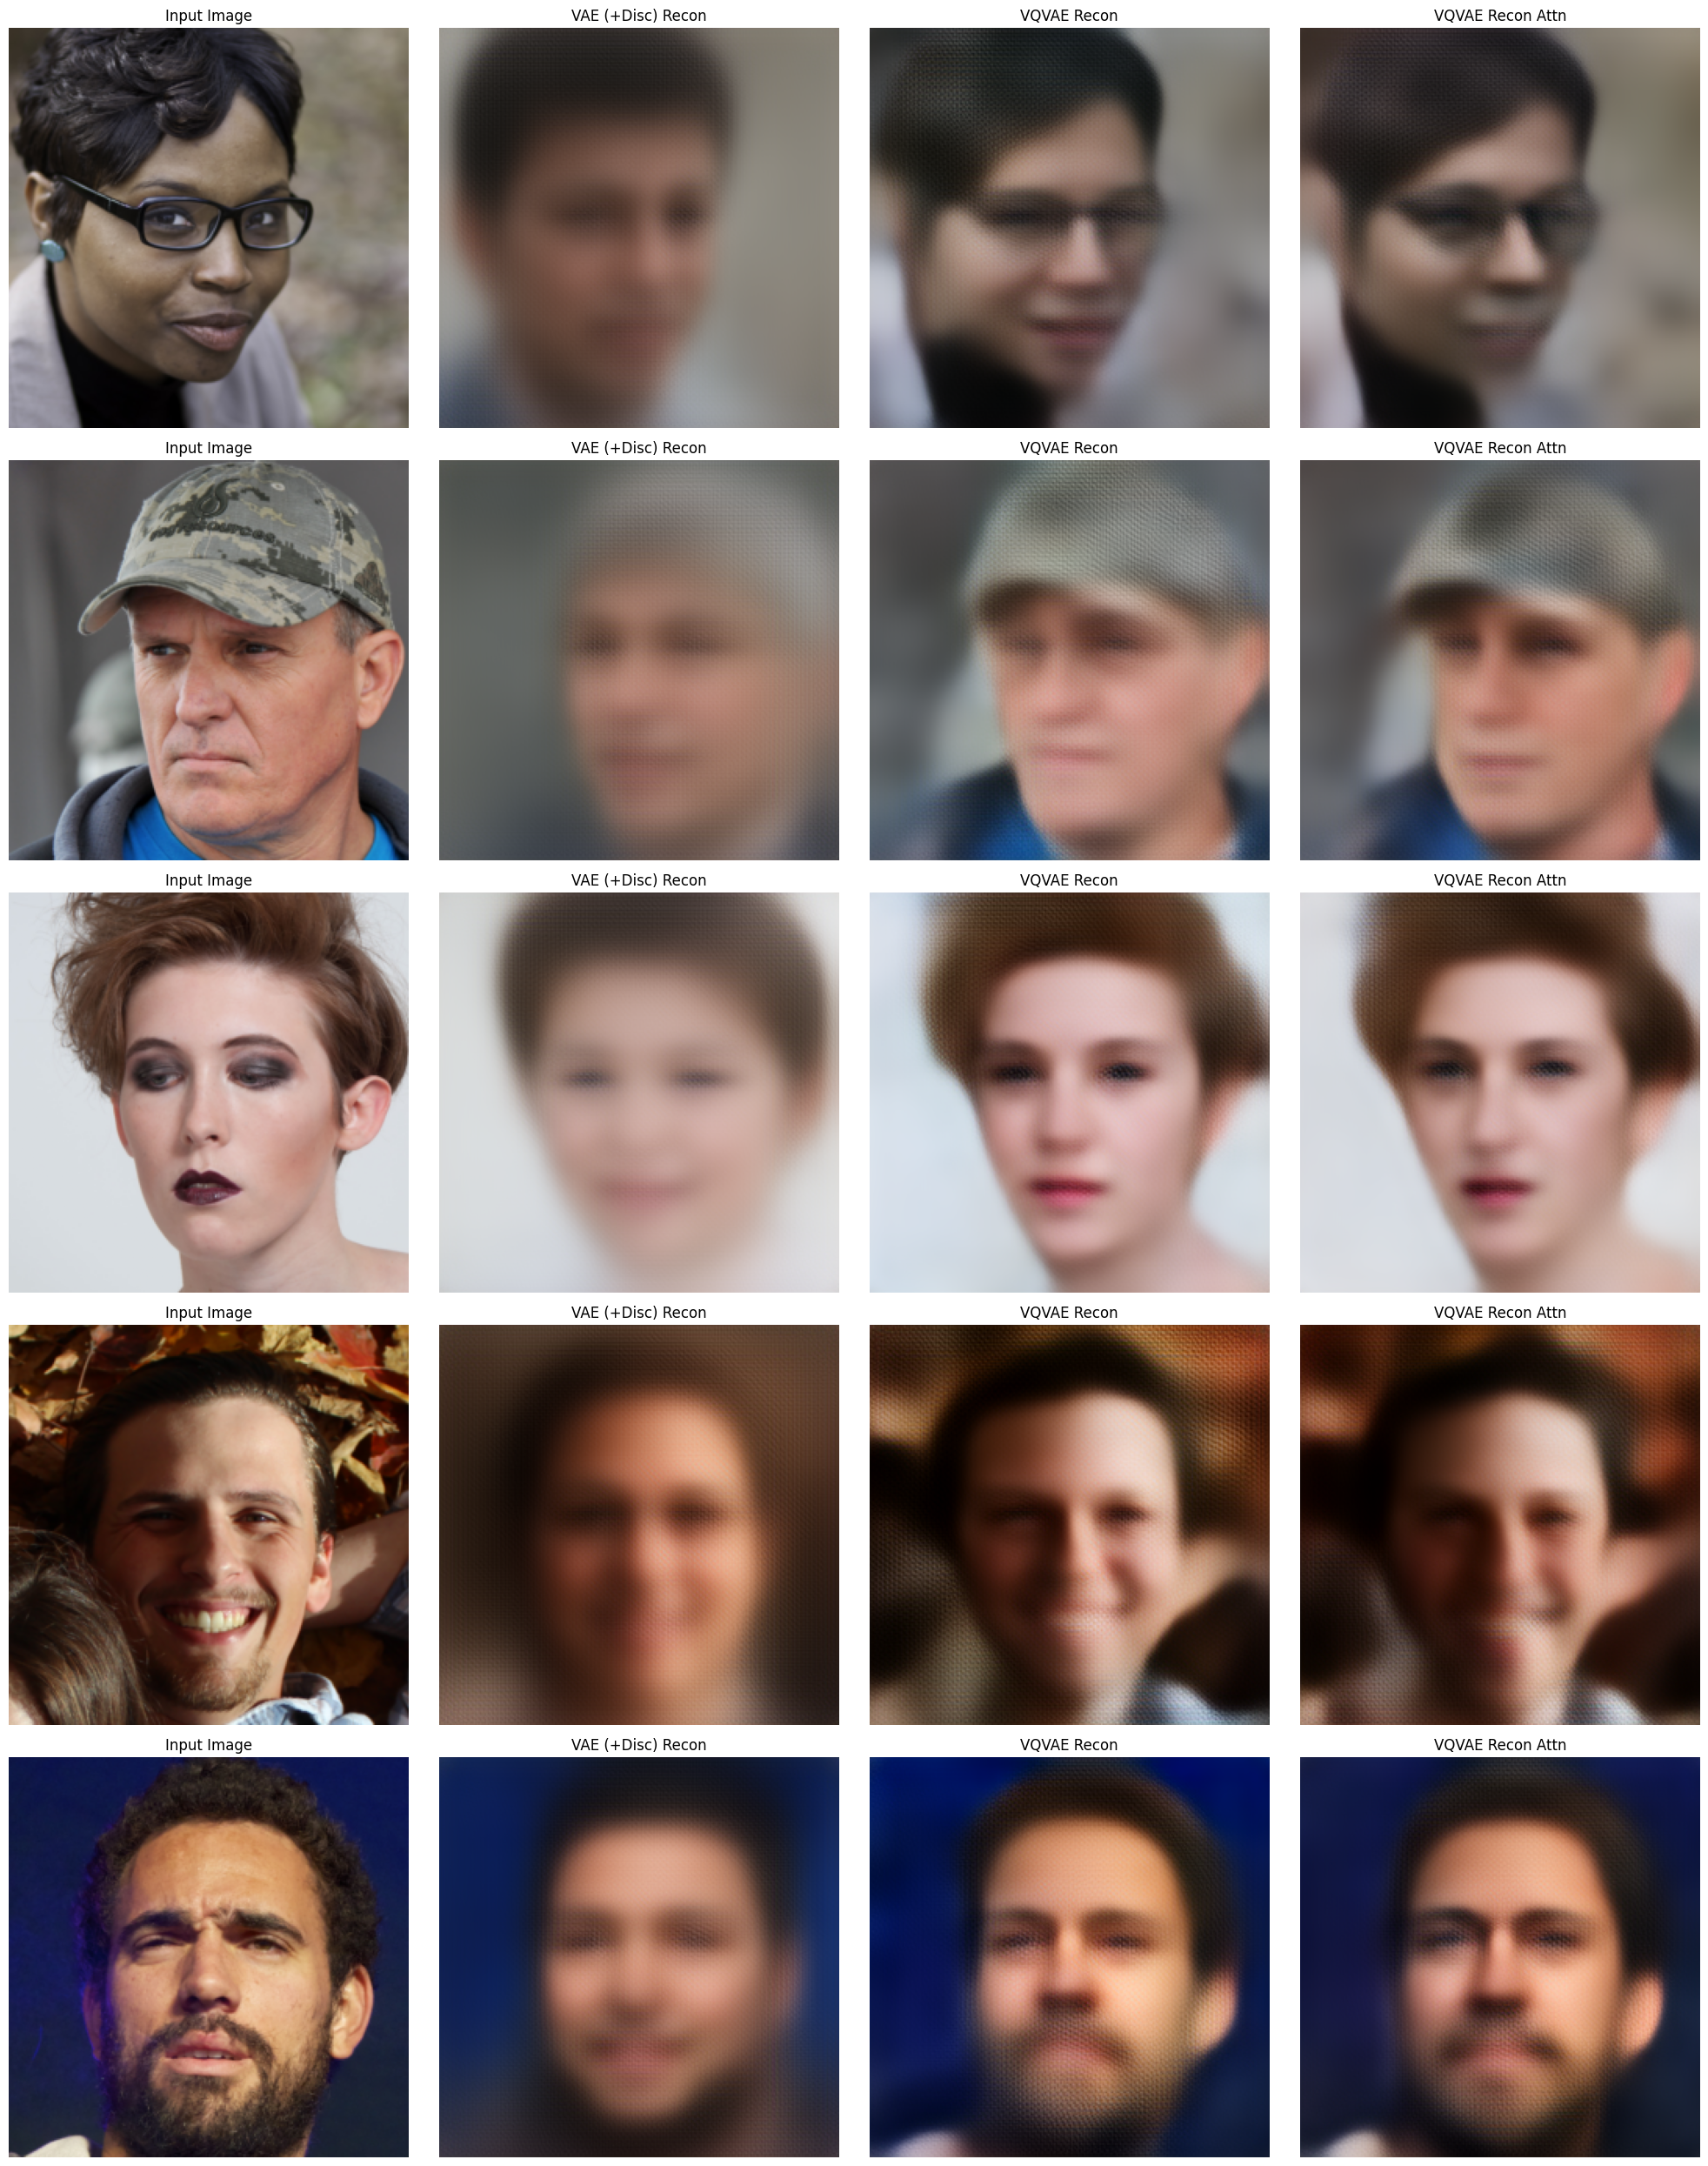

In [22]:
# Plot the input and reconstructed images
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
for i in range(5):
    ax[i, 0].imshow((input_images[i] + 1) / 2)
    ax[i, 0].set_title("Input Image")
    ax[i, 0].axis('off')
    ax[i, 1].imshow((recon_img_1[i] + 1) / 2)
    ax[i, 1].set_title("VAE (+Disc) Recon")
    ax[i, 1].axis('off')
    ax[i, 2].imshow((recon_img_2[i] + 1) / 2)
    ax[i, 2].set_title("VQVAE Recon") #Autoencoder Recon
    ax[i, 2].axis('off')
    ax[i, 3].imshow((recon_img_3[i] + 1) / 2)
    ax[i, 3].set_title("VQVAE Recon Attn")
    ax[i, 3].axis('off')
plt.tight_layout()
plt.show()